In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import datetime
import sklearn.model_selection as train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('number of travelers.csv', delimiter = ',')

In [7]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [8]:
df.tail()

,month,passengers
235,2019-08-01,83784
236,2019-09-01,72590
237,2019-10-01,78617
238,2019-11-01,73074
239,2019-12-01,79302


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

month         0
passengers    0
dtype: int64

In [12]:
df['month'] = pd.to_datetime(df['month'])

In [13]:
df['month_name'] = df['month'].dt.month_name()
df.head()

,month,passengers,month_name
0,2000-01-01,46492,January
1,2000-02-01,48526,February
2,2000-03-01,58764,March
3,2000-04-01,56033,April
4,2000-05-01,58201,May


# Création de variables indicatrices

In [14]:
dummies = pd.get_dummies(df['month_name'], dtype = int)

In [15]:
df = pd.concat([df, dummies], axis = 1)

In [16]:
df.head()

,month,passengers,month_name,April,August,December,February,January,July,June,March,May,November,October,September
0,2000-01-01,46492,January,0,0,0,0,1,0,0,0,0,0,0,0
1,2000-02-01,48526,February,0,0,0,1,0,0,0,0,0,0,0,0
2,2000-03-01,58764,March,0,0,0,0,0,0,0,1,0,0,0,0
3,2000-04-01,56033,April,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-05-01,58201,May,0,0,0,0,0,0,0,0,1,0,0,0


# Linear Regresion

# Normalisation

In [17]:
df_mean, df_std = df['passengers'].mean(), df['passengers'].std()
df['passengers'] = (df['passengers'] - df_mean)/df_std

# Split (train/test)

In [18]:
df_length = len(df)
index_split = int(df_length * 0.75)
train_df = df[:index_split]
test_df = df[index_split:]

df["index_time"] = np.arange(1, len(df)+1,1)
df.head()

,month,passengers,month_name,April,August,December,February,January,July,June,March,May,November,October,September,index_time
0,2000-01-01,-1.820131,January,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2000-02-01,-1.585390,February,0,0,0,1,0,0,0,0,0,0,0,0,2
2,2000-03-01,-0.403839,March,0,0,0,0,0,0,0,1,0,0,0,0,3
3,2000-04-01,-0.719020,April,1,0,0,0,0,0,0,0,0,0,0,0,4
4,2000-05-01,-0.468814,May,0,0,0,0,0,0,0,0,1,0,0,0,5


In [19]:
x_train = train_df[['January','February','March','April','May','June','July','August','September','October','November','December']].values
y_train = train_df["passengers"].values

x_test = test_df[['January','February','March','April','May','June','July','August','September','October','November','December']]
y_test = test_df["passengers"]

# Entrainement

In [29]:
mod = LinearRegression()
mod.fit(x_train, y_train)

LinearRegression()

In [33]:
y_train_predict =  mod.predict(x_train)
y_test_predict = mod.predict(x_test)

C:\Users\Celine\Documents\machine-learning\data_env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [34]:
y_train = y_train * df_std + df_mean
y_test = y_test * df_std + df_mean

y_train_predict = y_train_predict* df_std + df_mean
y_test_predict = y_test_predict* df_std + df_mean

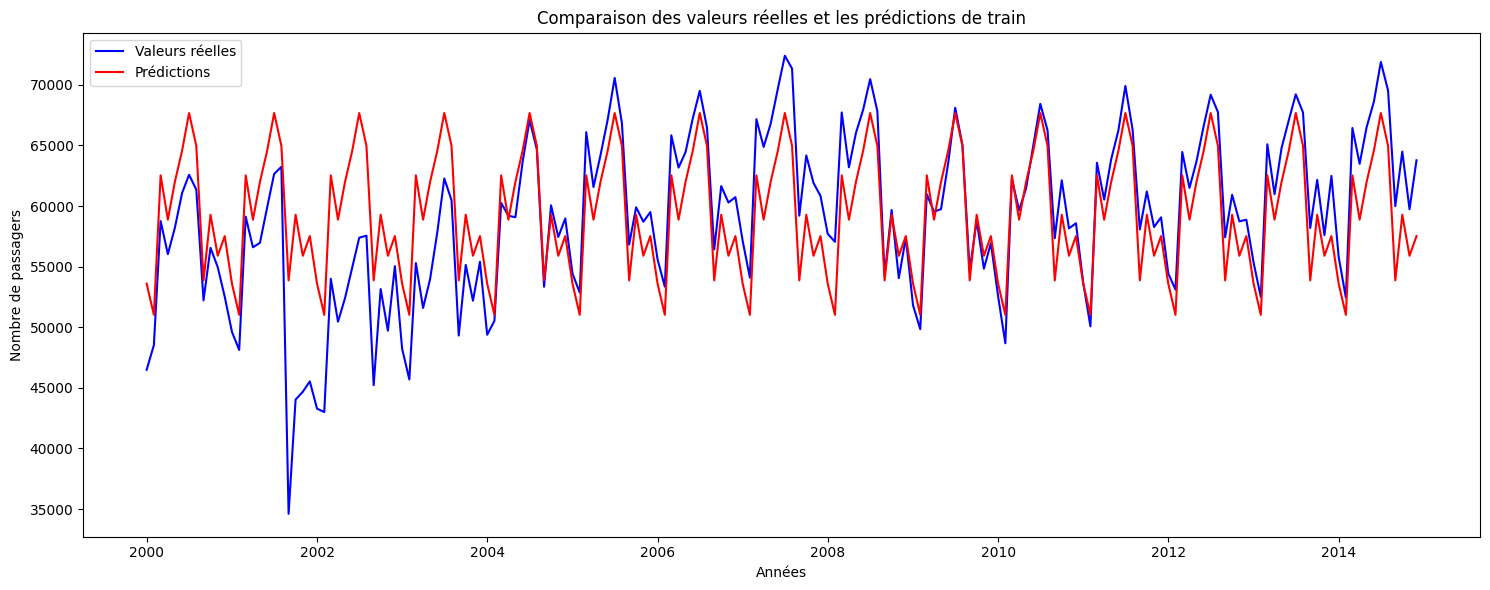

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(train_df["month"], y_train, color='b', label='Valeurs réelles')
plt.plot(train_df["month"], y_train_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et les prédictions de train')

plt.legend()

plt.tight_layout()
plt.show()

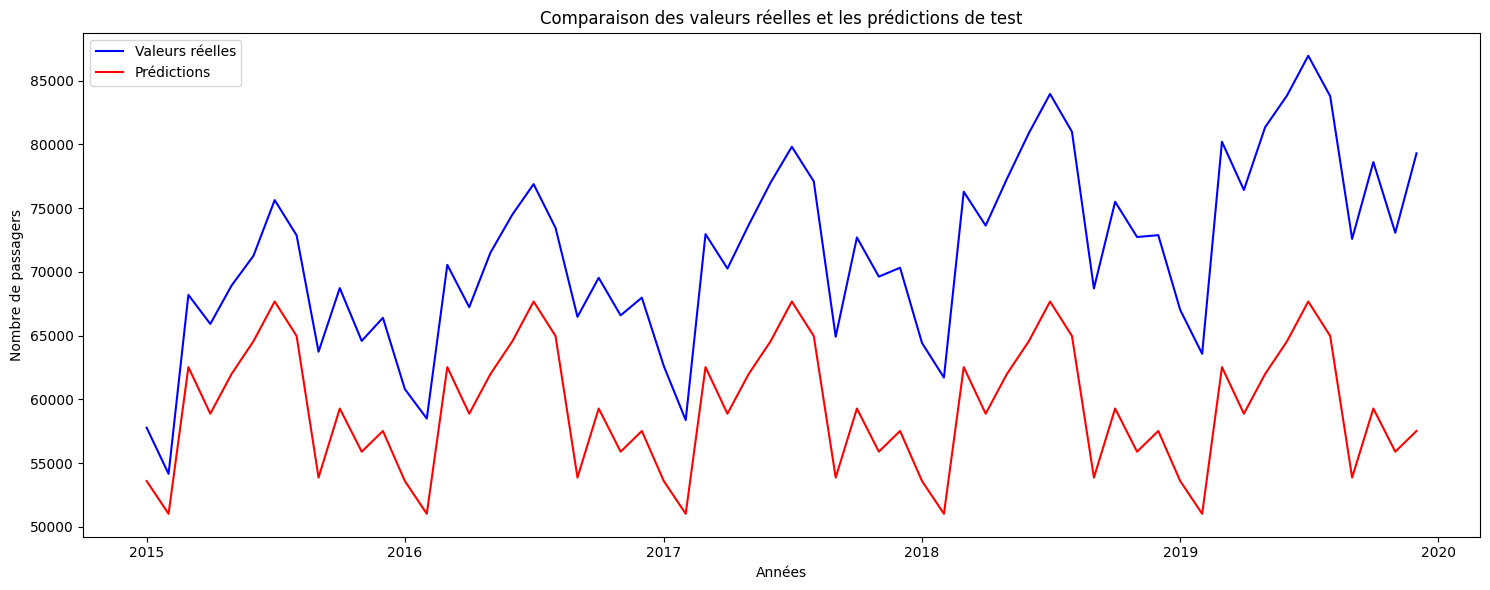

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(test_df["month"], y_test, color='b', label='Valeurs réelles')
plt.plot(test_df["month"], y_test_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et les prédictions de test')

plt.legend()

plt.tight_layout()
plt.show()